In [1]:
!pip install Wordcloud
!pip install Sastrawi

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.naive_bayes import MultinomialNB

from wordcloud import WordCloud, STOPWORDS

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 6.7 MB/s eta 0:00:00


In [2]:
data = pd.read_csv('/content/drive/MyDrive/Sarjana_Semester3_ArtificialIntelligence/AOL_Artificial_Intelligence_Semester3/Dataset_Car_ReviewFuel.csv')

**1. DATA UNDERSTANDING**

In [3]:
data.dtypes

sentence     object
sentiment    object
dtype: object

In [4]:
data.shape

(180, 2)

In [5]:
data = data.dropna()
data.isnull().sum()

sentence     0
sentiment    0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.describe()

,sentence,sentiment
count,180,180
unique,180,3
top,Terios paling gagah . Apalagi warna merah meta...,neutral
freq,1,149


**2. PREPROCESSING TEXT**

In [8]:
data['sentence'] = data['sentence'].str.lower()
data.head()

,sentence,sentiment
0,terios paling gagah . apalagi warna merah meta...,neutral
1,"gue pakai mobilio . menurut gue , bener fun to...",neutral
2,ya walaupun memiliki desain sporty kalau tingk...,neutral
3,xpander laku keras di pasar indonesia .,neutral
4,"kalau mau segala enak pakai avanza saja , mas .",neutral


In [9]:
norm = {" terios " : " mobil ", " mobilio " : " mobil ", " fun to drive " : " asyik dikendarai ", " sporty " : " mencolok ", " xpander " : " mobil ", " - " : " ", "." : " ", "!" : " ", "," : " ", "?" : " ", " avanza " : " mobil ", " vario " : " motor ", " rush " : " mobil ", " scoopy " : " motor ", " spacy " : " ", " mini cooper " : " mobil ", " cakep " : " ganteng ", " grandmax " : " mobil ", " suzuki " : " motor ", " carry " : " ", " alay " : " berlebihan ", " honda " : " motor ", " brio " : " motor ", " jelek " : " buruk ", " deh " : " ", " hr " : " ", " bayangan " : " harapan ", " euy " : " ", " alphard " : " mobil ", " mah " : " ", " nissan " : " ", " 98 " : " ", " 000 " : " ", " livina " : " ", " x " : " ", " gear " : " ", " 2009 " : " ", " rewel " : " cepat rusak ", " oke " : " baik ", " grand " : " ", " ngelitik " : " kendala ", " tune up " : " naik tingkat ", " bantingan " : " kendali ", " 3x " : " ", " shell " : " bensin ", " enggak " : " tidak ", " premium " : " berkualitas ", " 2008 " : " ", " xv " : " ", " 1 " : " ", " 8 " : " ", " problem " : " masalah ", " nissan " : " mobil ", " 7 " : " ", " rada " : " agak ", " amblas " : " buruk ", " vega " : " ", " force " : " ", " bandel " : " nakal ", " nan " : " dan ", " irit " : " hemat ", " dgn " : " dengan ", " cocok " : " sesuai ", " & " : " dan ", " banget " : " amat ", " sobat " : " teman ", " yg " : " yang ", " pengin " : " ingin ", " Win100 " : " ", " medan " : " situasi ", " kaligawe " : " ", " bangetlah " : " amat ", " kok " : " kenapa ", " ngerasa " : " merasa ", " mitsubishi " : " mobil ", " buat " : " untuk ", " body " : " tubuh ", " gampang " : " mudah ", " pas " : " saat ", " :D " : " ", " 125 " : " ", " esp " : " ", " gesit " : " lincah ", " sih " : " ini ", " ngadat " : " macet ", " ngegeber " : " kendala ", " ngeri " : " takut ", " dah " : " ", " xenia " : " mobil ", " turun " : " rusak ", " dong " : " ", " temen " : " teman ", " xexi " : " mobil ", " 2009 " : " ", " berisik " : " ribut ", " toyota " : " mobil ", " cayla " : " mobil ", " alus " : " halus ", " daihatsu " : " mobil ", " alya " : " mobil ", " nih " : " ini ", " gl xv at 2012 " : " mobil ", " after sales " : " layanan ", " service " : " servis ", " nya " : " itu ", " fu150 tahun 2014 " : " motor ", " honda spacy " : " motor ", " boks " : " kotak ", " nopol " : " ", " 14 desember " : " tanggal ", " 11 januari " : " tanggal ", " 15 " : " ", " sampe " : " sampai ", " sparepart " : " cadangan ", " purnajual " : " servis ", " stnk " : " surat ", " 7 " : " ", " cuma " : " hanya ", " 3 " : " ", " waduh " : " terkejut ", " terus " : " lalu ", " gps " : " ", " gue " : " saya ", " info " : " informasi ", " 2 " : " ", " toyota " : " mobil ", " hadeh " : " kecewa ", " inden " : " pengiriman ", " x " : " ", " pander " : " mobil ", " esemka " : " mobil ", " _ " : " ", " honda " : " motor ", " malah " : " justru ", " rembes " : " bocor ", " yamaha " : " motor ", " shock " : " komponen ", " macem " : " macam ", " 450 ribu " : " uang", " ahass " : " ", " komplit " : " lengkap ", " gak " : " tidak ", " ngerasa " : " merasa ", " kayak " : " seperti ", " guys " : " teman ", " yamaha chiampelas" : " bengkel ", " nissan indonesia " : " bengkel ", " coi " : " ", " cucok " : " gagah ", " keren " : " bagus ", " mudik " : " pulang kampung ", " sak " : " karung ", " tbh " : " jujur ", " gw " : " aku ", " ane " : " aku ", " ckd " : " bongkar ", " lemot " : " pelan ", " amburadul " : " kacau ", " kantong " : " dompet ", " splash " : " motor ", " formo " : " mobil ", " suck " : " buruk ", " sunter " : " mall ", " wuling " : " mobil ", " cortez " : " mobil ", " maknyus " : " sedap ", " freed " : " mobil ", " mio " : " motor ", " bbm " : " bahan bakar ", " confero " : " mobil ", " cbr " : " motor ", " lexi " : " motor ", " aerox " : " motor ", " mpv " : " mobil kecil ", " pajero " : " mobil ", " 181 ps " : " ", " fortuner " : " mobil ", " sport " : " tangguh ", " eeeeeeee " : " ", " trd " : " balap ", " mantul " : " puas ", " dakar " : " ", " design " : " desain ", " fiture " : " fitur ", " safety "  : " keamanan ", " 4x2 " : " ", " turbo " : " naik tingkat ", " all new " : " ", " offroad " : " luar jalan ", " exterior " : " badan ", " interior " : " desain ", " bodi " : " badan ", " sih " : " lumayan ", " otto " : " ", " 155 " : " ", " nmax " : " motor ", " revo " : " motor ", " fi " : " ", " mah " : " itu ", " 1300 " : " ", " matic " : " otomatis ", " 10 " : " ", " 15 " : " ", " pcx " : " ", " r15 " : " ", " v13 " : " ", " vios " : " mobil ", " tekor " : " habis uang ", " ar " : " ", " v " : " ", " kijang " : " mobil ", " inova " : " mobil ", " hem " : " bergumam ", " agya " : " mobil ", " bro " : " kawan ", " seirit iritnya " : " hemat sekali ", " andal " : " handal ", " satria " : " motor ", " 1 bulan " : " cukup lama ", " pede " : " percaya diri ", " ekslkusif " : " eksklusif ", " seksi " : " menawan ", " 2018 " : " ", " lega " : " luas ", " leg room " : " ruang kaki ", " 2 " : " ", " fu " : " ", " xride " : " mobil ", " air bag " : " keamanan ", " dashboard " : " ruang kendali ", " murahan " : " pasaran ", " tipe e " : " murah ", " facelift " : " modifikasi ", " garapan " : " pekerja ", " diadu " : " dibandingkan ", " merajai " : " unggul ", " keong " : " tipe ", " cempreng " : " nyaring ", " tuh " : " itu ", " roof " : " atap ", " monitor " : " televisi ", " double blower " : " kipas ", " siang bolong " : " tengah hari ", " ac " : " pendingin ", " jedak jeduk " : " terantuk antuk ", " jedag jeduk " : " terantuk antuk ", " wkwkwkwkw " : " tertawa ", " kalo " : " kalau", " mantap " : " luar biasa "}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

data['sentence'] = data['sentence'].apply(lambda x: normalisasi(x))

In [10]:
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_word = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

data['sentence'] = data['sentence'].apply(lambda x: stopword(x))
data.head()

,sentence,sentiment
0,terios paling gagah warna merah metalic,neutral
1,gue pakai mobil saya bener asyik dikendara...,neutral
2,walaupun memiliki desain mencolok kalau tingka...,neutral
3,xpander laku keras pasar indonesia,neutral
4,kalau mau segala enak pakai mobil mas,neutral


In [11]:
tokenized = data['sentence'].apply(lambda x:x.split())
tokenized

0         [terios, paling, gagah, warna, merah, metalic]
1      [gue, pakai, mobil, saya, bener, asyik, dikend...
2      [walaupun, memiliki, desain, mencolok, kalau, ...
3               [xpander, laku, keras, pasar, indonesia]
4          [kalau, mau, segala, enak, pakai, mobil, mas]
                             ...                        
175    [kecewa, sama, bengkel, motor, bendan, pekerja...
176               [formo, baris, kedua, kursinya, buruk]
177           [setahu, motor, motor, dilengkapi, airbag]
178    [kalo, eksterior, saya, lebih, suka, motor, ca...
179     [jazz, hemat, bahan, bakar, jadi, hemat, dompet]
Name: sentence, Length: 180, dtype: object

In [12]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(sentence):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in sentence:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)

tokenized.to_csv('/content/drive/MyDrive/Sarjana_Semester3_ArtificialIntelligence/AOL_Artificial_Intelligence_Semester3/Clean_Dataset_Car_Review.csv', index = False)
data_clean = pd.read_csv('/content/drive/MyDrive/Sarjana_Semester3_ArtificialIntelligence/AOL_Artificial_Intelligence_Semester3/Clean_Dataset_Car_Review.csv', encoding='latin1')

terios paling gagah warna merah metalic
gue pakai mobil saya bener asyik kendara enak pakai
walaupun milik desain colok kalau tingkat nyaman mobil kurang kurang kan
xpander laku keras pasar indonesia
kalau mau segala enak pakai mobil mas
kalau mahasiswa lebih baik pakai motor
nyaman pakai mobil mobil
xpander enak lumayan pakai selalu hati pokok
aku lumayan nyaman motor
scoopy sangat dukung mobilisasi ku hari
puas pakai meski tidak produksi
mini cooper paling ganteng antara lain
seluruh kecewa mobil
sumpah motor lebih lumayan
bangga kalau pakai mobil
honda motor buruk aku sesal beli
senang pakai mobil mobil
sayang sama si kecil calya
sesal beli mobil c sesuai harap ku
jadi bangga gin kalaupakai mobil haha
pakai mobil pakai jarang cepat rusak mesin kaki nyaman kendali oke
pakai kendala lalu mesin padahal naik tingkat lebih pakai bensin lalu pernah kualitas
guna zaman dulu tahun alhamdulillah sekarang ada masalah kendala mesin lari enak
nissan tari lambat isi tumpang buruk
yamaha motor pe

In [13]:
data_clean.head()

,sentence
0,terios paling gagah warna merah metalic
1,gue pakai mobil saya bener asyik kendara enak ...
2,walaupun milik desain colok kalau tingkat nyam...
3,xpander laku keras pasar indonesia
4,kalau mau segala enak pakai mobil mas


In [14]:
at1 = pd.read_csv('/content/drive/MyDrive/Sarjana_Semester3_ArtificialIntelligence/AOL_Artificial_Intelligence_Semester3/Clean_Dataset_Car_Review.csv')
at2 = pd.read_csv('/content/drive/MyDrive/Sarjana_Semester3_ArtificialIntelligence/AOL_Artificial_Intelligence_Semester3/Dataset_Car_ReviewFuel.csv')
att2 = at2['sentiment']

data_clean = pd.concat([at1, att2], axis = 1)
data_clean.head()

,sentence,sentiment
0,terios paling gagah warna merah metalic,neutral
1,gue pakai mobil saya bener asyik kendara enak ...,neutral
2,walaupun milik desain colok kalau tingkat nyam...,neutral
3,xpander laku keras pasar indonesia,neutral
4,kalau mau segala enak pakai mobil mas,neutral


In [15]:
data_clean = data_clean.dropna()
data_clean = data_clean[data_clean['sentiment'] != 'neutral']
data_clean

,sentence,sentiment
24,yamaha motor pedal nakal hemat teman sesuai is...,positive
25,jadi beli motor win100 si motor nakal hemat un...,positive
26,bingung mau beli motor apa hemat tubuh enak li...,positive
28,mesin halus spontan bahan bakar hemat gaya tin...,positive
29,vario sangat top motor hari hemat bahan bakar ...,positive
30,honda motor tenaga besar lebih cepat hemat mot...,positive
70,fortuner desain lebih mewah boros bensin,negative
80,mobilio bensin hemat betul,positive
81,buat kalian bingung mau cari motor pilih motor...,positive
82,baru beli motor motor bulan lalu awal ragu ban...,negative


In [16]:
data_clean = data_clean.replace({'positive' : 1, 'negative' : 0})
data_clean.head()

,sentence,sentiment
24,yamaha motor pedal nakal hemat teman sesuai is...,1
25,jadi beli motor win100 si motor nakal hemat un...,1
26,bingung mau beli motor apa hemat tubuh enak li...,1
28,mesin halus spontan bahan bakar hemat gaya tin...,1
29,vario sangat top motor hari hemat bahan bakar ...,1


**3. VISUALISASI KATA**

In [17]:
positive_data = data_clean[data_clean['sentiment'] == 1]
negative_data = data_clean[data_clean['sentiment'] == 0]

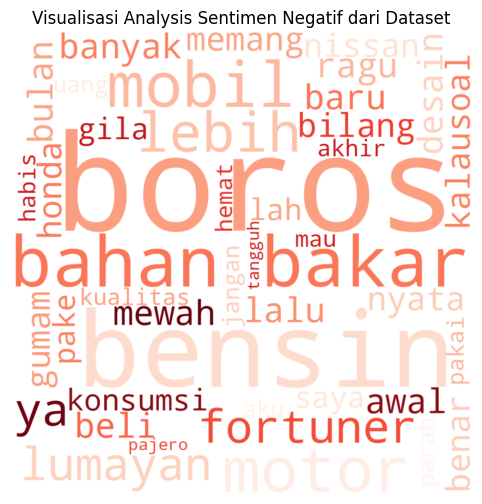

In [18]:
all_text_neg = ' '.join(word for word in negative_data["sentence"])
wordcloud = WordCloud(colormap = 'Reds', width = 1000, height = 1000, mode = 'RGBA', background_color = 'white').generate(all_text_neg)
plt.figure(figsize = (9, 6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title("Visualisasi Analysis Sentimen Negatif dari Dataset")
plt.margins(x = 0, y = 0)
plt.show()

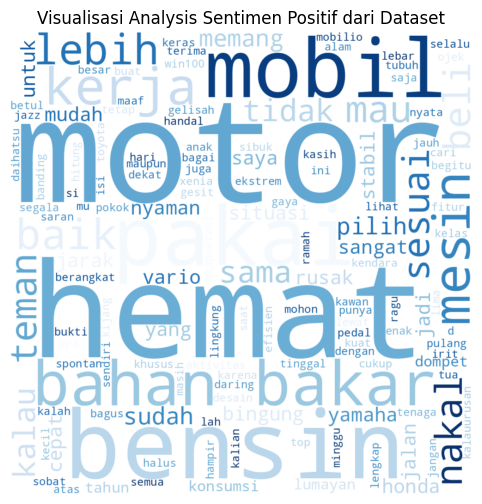

In [19]:
all_text_pos = ' '.join(word for word in positive_data['sentence'])
wordcloud = WordCloud(colormap = 'Blues', width = 1000, height = 1000, mode = 'RGBA', background_color = 'white').generate(all_text_pos)
plt.figure(figsize = (9, 6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title("Visualisasi Analysis Sentimen Positif dari Dataset")
plt.margins(x = 0, y = 0)
plt.show()

In [20]:
data_clean['sentiment'].value_counts()

sentiment
1    21
0    10
Name: count, dtype: int64

In [21]:
data_clean.head()

,sentence,sentiment
24,yamaha motor pedal nakal hemat teman sesuai is...,1
25,jadi beli motor win100 si motor nakal hemat un...,1
26,bingung mau beli motor apa hemat tubuh enak li...,1
28,mesin halus spontan bahan bakar hemat gaya tin...,1
29,vario sangat top motor hari hemat bahan bakar ...,1


<ipython-input-23-b18c7544fd9f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data_clean, x = 'sentiment', palette = {'0': "red", '1': "skyblue"})


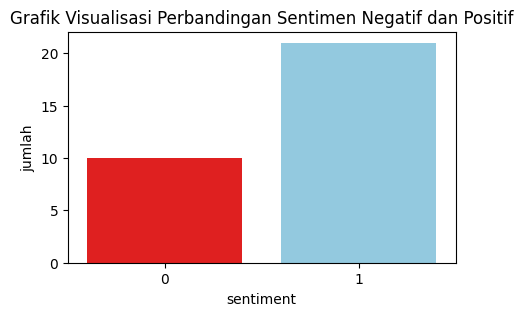

In [23]:
plt.figure(figsize = (5, 3))
sns.countplot(data = data_clean, x = 'sentiment', palette = {'0': "red", '1': "skyblue"})
plt.title('Grafik Visualisasi Perbandingan Sentimen Negatif dan Positif')
plt.xlabel('sentiment')
plt.ylabel('jumlah')
plt.show()

**4. DATA PREPARATION**

In [24]:
X = data_clean['sentence']
Y = data_clean['sentiment']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 42)

In [25]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [26]:
smote = SMOTE(random_state = 42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_vec, Y_train)

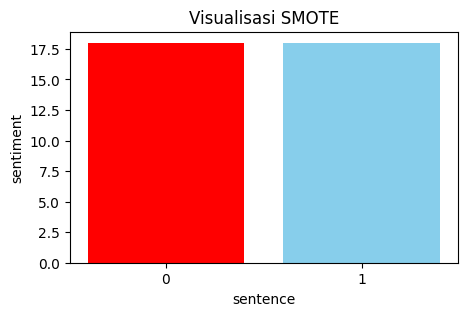

In [27]:
sentiment_counts = Y_train_resampled.value_counts()

plt.figure(figsize = (5, 3))
plt.bar(sentiment_counts.index, sentiment_counts.values, color = ['red', 'skyblue'])
plt.xlabel('sentence')
plt.ylabel('sentiment')
plt.title('Visualisasi SMOTE')
plt.xticks(sentiment_counts.index, ['0', '1'])
plt.show()

**5. MODELING**

In [28]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, Y_train_resampled)

MultinomialNB()

In [29]:
y_prediction = naive_bayes.predict(X_test_vec)

In [30]:
accuracy = accuracy_score(Y_test, y_prediction)
classification_rep = classification_report(Y_test, y_prediction, target_names = ['negatif', 'positif'])
print("Akurasi Model Naive Bayes: ", accuracy)
print("\nLaporan Klasifikasi: \n", classification_rep)

Akurasi Model Naive Bayes:  0.6

Laporan Klasifikasi: 
               precision    recall  f1-score   support

     negatif       0.50      0.50      0.50         2
     positif       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



**6. TESTING**

In [ ]:
  new_text = input("\nMasukkan Teks untuk Uji: ")
  new_text_vec = vectorizer.transform([new_text])
  analysis_result = naive_bayes.predict(new_text_vec)

  if analysis_result[0] == 1:
    sentiment_result = "Positive"
  elif analysis_result[0] == 0:
    sentiment_result = "Negative"

  print("Hasil Analysis Sentimen untuk Teks Uji: ", sentiment_result)